In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\ASUS\Desktop\PythonProjects\8_important_projects\Customer_segmentation\Dataset\OnlineRetail.csv',encoding='unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
(df.isnull().sum()/df.shape[0])*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [10]:
df.isnull().sum().sum()

136534

In [11]:
(df.isnull().sum().sum()/df.shape[0]*df.shape[1])*100

201.5600405234089

In [12]:
df.duplicated().sum()

5268

In [13]:
df.drop_duplicates(keep='first',inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(401604, 8)

In [17]:
df["InvoiceNo"].dtype

dtype('O')

In [18]:
# for i in df.select_dtypes(include="object").columns:
#     print(df[i].value_counts())
#     print("***"*10)
df["InvoiceNo"].value_counts()

InvoiceNo
576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C560912      1
560913       1
560917       1
572879       1
553049       1
Name: count, Length: 22190, dtype: int64

In [19]:
# Step 1: Convert to numeric, replacing garbage with NaN
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')

# Step 2: Drop rows with NaN values
df = df.dropna(subset=['InvoiceNo'])

# Step 3: Convert the column to integers
df['InvoiceNo'] = df['InvoiceNo'].astype(int)

print(df)

        InvoiceNo StockCode                          Description  Quantity  \
0          536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365     71053                  WHITE METAL LANTERN         6   
2          536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...       ...                                  ...       ...   
541904     581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905     581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906     581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907     581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908     581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country 

In [20]:
df.shape

(392732, 8)

In [21]:
# # box plot
# for i in df.select_dtypes(include="number").columns:
#     sns.boxplot(data=df,x=i)
#     plt.show()


In [22]:
# def Min_max(col):
#     q1,q3 = np.percentile(col, [25,75])
#     iqr = q3 - q1
#     min_range = q1 - (1.5 * iqr)
#     max_range = q3 + (1.5 * iqr)
#     return min_range,max_range

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  int32  
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 25.5+ MB


In [24]:
# for i in ['InvoiceNo','Quantity','UnitPrice', 'CustomerID']:
#     min_range,max_range = Min_max(df[i])
#     df[i] = np.where(df[i] < min_range, min_range, df[i])
#     df[i] = np.where(df[i] > max_range, max_range, df[i])

In [25]:
# for i in ['InvoiceNo','Quantity','UnitPrice', 'CustomerID']:
#     sns.boxplot(data=df,x=i)
#     plt.show()

In [26]:
df.shape

(392732, 8)

In [27]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


 ## What is RFM?
R (Recency): Number of days since last purchase
F (Frequency): Number of tracsactions
M (Monetary): Total amount of transactions (revenue contributed)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  int32  
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 25.5+ MB


# Finding Monetary

In [30]:
df['CustomerID']=df['CustomerID'].astype(str)

In [31]:
df['Amount']=df['Quantity']*df['UnitPrice']

In [32]:
rfm_m=df.groupby('CustomerID')['Amount'].sum()

In [33]:
rfm_m

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2045.53
18287.0     1837.28
Name: Amount, Length: 4339, dtype: float64

In [34]:
rfm_m.reset_index()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2045.53


In [35]:
print(rfm_m)


CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2045.53
18287.0     1837.28
Name: Amount, Length: 4339, dtype: float64


# Finding Frequency

In [36]:
rfm_f=df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f.reset_index()
print(rfm_f)

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    721
18287.0     70
Name: InvoiceNo, Length: 4339, dtype: int64


In [37]:
rfm_f

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    721
18287.0     70
Name: InvoiceNo, Length: 4339, dtype: int64

# Finding Recency

In [38]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%m/%d/%Y %H:%M')

In [39]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392732, dtype: datetime64[ns]

In [40]:
max_date=max(df['InvoiceDate'])

In [41]:
max_date

Timestamp('2011-12-09 12:50:00')

In [42]:
df['Diffrence']=max_date-df['InvoiceDate']

In [43]:
df['Diffrence']

0        373 days 04:24:00
1        373 days 04:24:00
2        373 days 04:24:00
3        373 days 04:24:00
4        373 days 04:24:00
                ...       
541904     0 days 00:00:00
541905     0 days 00:00:00
541906     0 days 00:00:00
541907     0 days 00:00:00
541908     0 days 00:00:00
Name: Diffrence, Length: 392732, dtype: timedelta64[ns]

In [44]:
rfm_r=df.groupby('CustomerID')['Diffrence'].min()

In [45]:
rfm_r

CustomerID
12346.0   325 days 02:49:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
                 ...       
18280.0   277 days 02:58:00
18281.0   180 days 01:57:00
18282.0     7 days 01:07:00
18283.0     3 days 00:48:00
18287.0    42 days 03:21:00
Name: Diffrence, Length: 4339, dtype: timedelta64[ns]

In [46]:
rfm_r=rfm_r.reset_index()

In [47]:
rfm_r.columns=['CustomerID','Diffrence']
print(rfm_r)

     CustomerID         Diffrence
0       12346.0 325 days 02:49:00
1       12347.0   1 days 20:58:00
2       12348.0  74 days 23:37:00
3       12349.0  18 days 02:59:00
4       12350.0 309 days 20:49:00
...         ...               ...
4334    18280.0 277 days 02:58:00
4335    18281.0 180 days 01:57:00
4336    18282.0   7 days 01:07:00
4337    18283.0   3 days 00:48:00
4338    18287.0  42 days 03:21:00

[4339 rows x 2 columns]


In [48]:
rfm_r['Diffrence']=rfm_r['Diffrence'].dt.days

In [49]:
print(rfm_r)

     CustomerID  Diffrence
0       12346.0        325
1       12347.0          1
2       12348.0         74
3       12349.0         18
4       12350.0        309
...         ...        ...
4334    18280.0        277
4335    18281.0        180
4336    18282.0          7
4337    18283.0          3
4338    18287.0         42

[4339 rows x 2 columns]


In [50]:
rfm_final=pd.merge(rfm_m,rfm_f,on='CustomerID',how='inner')

In [51]:
rfm_final=pd.merge(rfm_final,rfm_r,on='CustomerID',how='inner')

In [52]:
rfm_final.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']


In [53]:
rfm_final.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [54]:
rfm_final.isnull().sum()

CustomerID    0
Amount        0
Frequency     0
Recency       0
dtype: int64

In [55]:
rfm_final.shape

(4339, 4)

# Finding Outlier

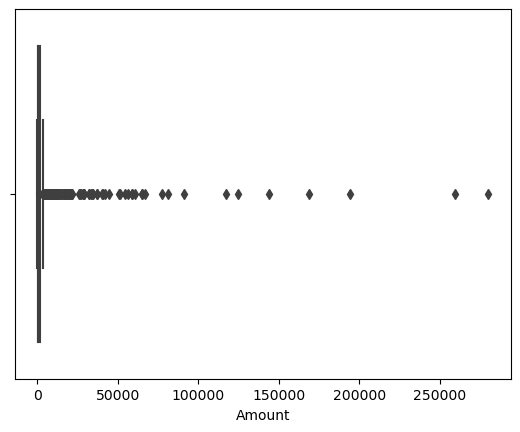

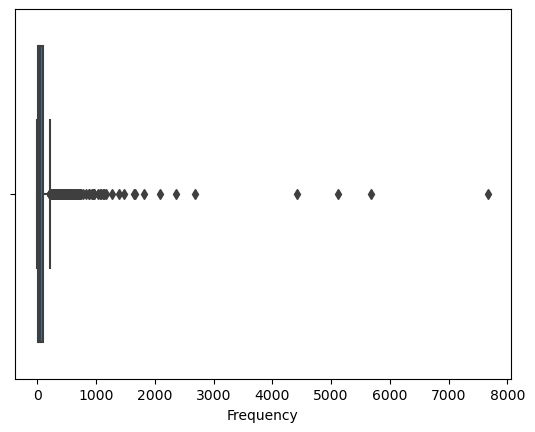

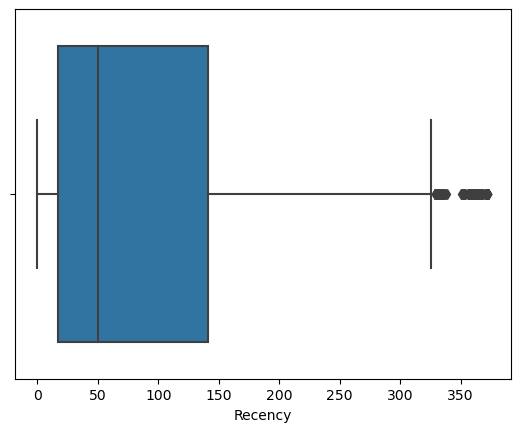

In [57]:
# box plot
for i in rfm_final.select_dtypes(include="number").columns:
    sns.boxplot(data=rfm_final,x=i)
    plt.show()


# Removing Outlier

In [58]:
def Min_max(col):
    q1,q3 = np.percentile(col, [25,75])
    iqr = q3 - q1
    min_range = q1 - (1.5 * iqr)
    max_range = q3 + (1.5 * iqr)
    return min_range,max_range

In [59]:
rfm_final.columns

Index(['CustomerID', 'Amount', 'Frequency', 'Recency'], dtype='object')

In [62]:
for i in ['Amount', 'Frequency', 'Recency']:
    min_range,max_range = Min_max(rfm_final[i])
    rfm_final[i] = np.where(rfm_final[i] < min_range, min_range, rfm_final[i])
    rfm_final[i] = np.where(rfm_final[i] > max_range, max_range, rfm_final[i])

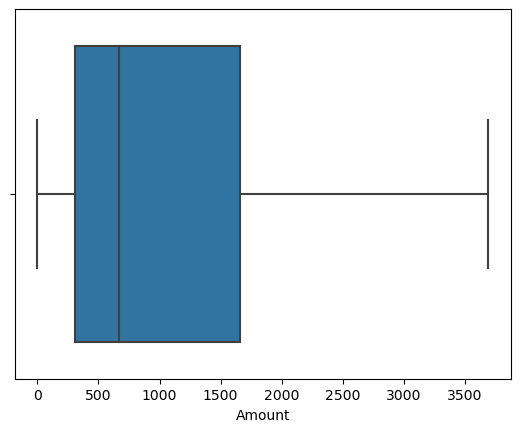

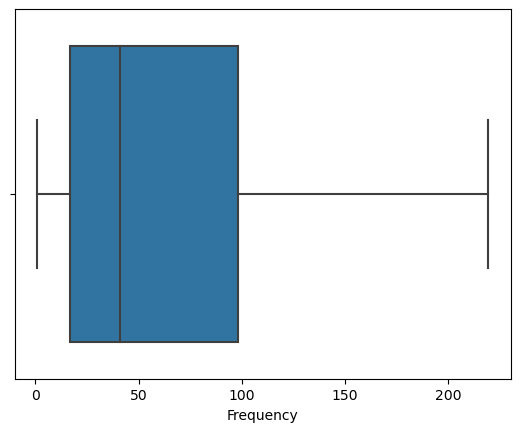

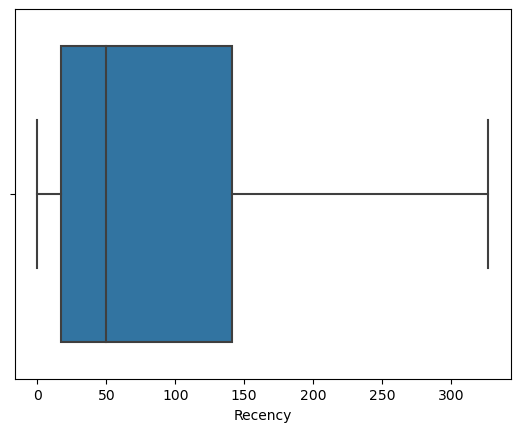

In [63]:
for i in ['Amount', 'Frequency', 'Recency']:
    sns.boxplot(data=rfm_final,x=i)
    plt.show()


In [64]:
rfm_final.shape

(4339, 4)

In [65]:
rfm_final.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,3691.105,1.0,325.0
1,12347.0,3691.105,182.0,1.0
2,12348.0,1797.240,31.0,74.0
3,12349.0,1757.550,73.0,18.0
4,12350.0,334.400,17.0,309.0


# Importing important libraries

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
X=rfm_final[['Amount', 'Frequency', 'Recency']]

In [69]:
scaler=MinMaxScaler()

In [72]:
rfm_scaled=scaler.fit_transform(X)

In [73]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_scaled.head()

,Amount,Frequency,Recency
0,1.000000,0.000000,0.993884
1,1.000000,0.828375,0.003058
2,0.486911,0.137300,0.226300
3,0.476158,0.329519,0.055046
4,0.090596,0.073227,0.944954
